In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import warnings
import pandas as pd
import networkx as nx
import math
import glob
from scipy import stats

from sklearn.metrics import mean_squared_error

# Coloring prediction plots with major solvent classes and number of solvent classes

In [2]:
file_path = r"/Users/murtazazohair/Desktop/Python/IC/Paper Figures/Model Performance Figure/test_082324_FM_pred.xlsx"
# data = pd.read_csv(file_path)
data = pd.read_excel(file_path,)

data.columns = [ent.strip() for ent in data.columns]
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# data = data[(data['temperature ( C )'] > 10) & (data['temperature ( C )'] < 30)]
# data = data[(data['ionic'] >= 3) & (data['ionic'] <= 4)]

fn = r'/Users/murtazazohair/Library/CloudStorage/Box-Box/IBM INTERNAL - Battery Team Database_2019-2025/AI-ML Projects/Ionic Conductivity/SMILES Materials Info.xlsx'
smiles_df = pd.read_excel(fn,header=0,usecols=[0,1,2,3,4,5,6])
data


,smiles1,conc1,smiles2,conc2,smiles3,conc3,smiles4,conc4,smiles5,conc5,smiles6,conc6,Unnamed: 0,temperature,ionic,ionic_predicted
0,F[P-](F)(F)(F)(F)F.[Li+],14.249250,CC1COC(=O)O1,28.427670,CCOC(=O)OCC,57.32308,O,0.00000,O,0.000000,O,0,0,-39.40000,2.451262,2.563754
1,F[P-](F)(F)(F)(F)F.[Li+],10.761550,O=C1OCCO1,29.399590,CC1COC(=O)O1,25.36010,CCOC(=O)OC,33.15866,O=P(OCC(F)(F)F)(OCC(F)(F)F)OCC(F)(F)F,1.320104,O,0,1,-20.00000,3.141294,3.252687
2,F[P-](F)(F)(F)(F)F.[Li+],5.037101,O=C1OCCO1,60.291350,CC1COC(=O)O1,34.67155,O,0.00000,O,0.000000,O,0,2,39.30000,3.966317,4.022731
3,O=C1O[B-]2(OC1=O)OC(=O)C(=O)O2.[Li+],6.097559,CC1COC(=O)O1,34.295250,C1COCCO1,59.60719,O,0.00000,O,0.000000,O,0,3,-19.80000,3.592120,3.547340
4,[Li+].[O-][Cl+3]([O-])([O-])[O-],4.935158,COCCOC,95.064840,O,0.00000,O,0.00000,O,0.000000,O,0,4,29.87128,3.469613,3.504866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,F[As-](F)(F)(F)(F)F.[Li+],7.997118,O=C1OCCO1,29.990780,CC1COC(=O)O1,23.50043,COCCOC,38.51167,O,0.000000,O,0,2729,20.00000,4.158362,4.220752
2730,F[As-](F)(F)(F)(F)F.[Li+],10.391160,COCCOC,15.012190,O=S1(=O)CCCC1,54.47641,COCCOCCOCCOC,20.12023,O,0.000000,O,0,2730,-40.00000,2.146128,2.160734
2731,O=C1O[B-]2(OC1=O)OC(=O)C(=O)O2.[Li+],6.826268,CC1COC(=O)O1,93.173730,O,0.00000,O,0.00000,O,0.000000,O,0,2731,-19.80000,2.622582,2.630806
2732,F[P-](F)(F)(F)(F)F.[Li+],6.490683,O=c1occo1,10.170807,O=C1OCCO1,53.26087,CCOC(=O)OC,30.07764,O,0.000000,O,0,2732,30.00000,4.002501,4.061032


In [3]:
def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [4]:
## Add a column to the data for RMSE
predictions = data['ionic_predicted']
predictions = np.reshape(predictions,-1)
labels = data['ionic']
labels = np.reshape(labels,-1)


Solvent Class Dictionary

In [73]:

carb = ["C1COC(=O)O1","CCOC(=O)OCC","COC(=O)OC","CCOC(=O)OC","CC1COC(=O)O1","C1=COC(=O)O1","C1C(OC(=O)O1)F","C1(C(OC(=O)O1)F)F","COCCOC(=O)OC","COC(=O)OCCOC(=O)OC"]
ether = ["C1COCO1","C1OCOCO1","COCCOC","COCCOCCOC","COCCOCCOCCOC","COCCOCCOCCOCCOC","C1COCCO1","CCOCCOCC","CC(CC(OC)OC)OC","COCC(C)OC(C)COC","CCOCCOCCO","COCCO"]
nitr = ["CC#N","COCC#N","CC(C#N)OC","C(CCC#N)CC#N","C(CC#N)C#N","CCC#N","CCCC#N"]
urea = ["CN1CCN(C1=O)C","CNC(=O)NC","O=C1N(C)CCCN1C"]
sulf = ["CS(=O)C","C1CCS(=O)(=O)C1","CC1CCS(=O)(=O)C1","CCCS(=O)(=O)CCC","O=S1OCCO1","O=S(OC)OC"]
lact = ["C1CCC(=O)OCC1","O=C1OCCC1",'O=C1CCCCO1','CC1CCC(=O)O1','CCCC1CCC(=O)O1','C1CC(=O)OC1']
ester = ["O1CCOCC1","CC(=O)OC","CCOC=O","CCCCOC=O","CCCCOC(=O)C",'COC=O','CCC(=O)OC','COC(=O)CC(F)(F)F','CCCC(=O)OC','CCCOC(=O)CC']
# fether = ["C(C(C(F)F)(F)F)OC(C(F)F)(F)F",'C(C(F)(F)F)OC(C(F)F)(F)F','C(C(C(F)F)(F)F)OC(C(F)F)(F)F','FC(F)(F)COCCOCCOCC(F)(F)F',"FC(F)(F)COCCOCCOCCOCC(F)(F)F","FC(F)(F)COCCOCCOCCOCCOCC(F)(F)F","FC(F)(F)COCCOCCOCCOCCOCCOCC(F)(F)F","FC(F)(F)C(F)(F)COCCOCCOCC(F)(F)C(F)(F)F","FC(F)(F)C(F)(F)COCCOCCOCCOCC(F)(F)C(F)(F)F","FC(F)(F)C(F)(F)COCCOCCOCCOCCOCC(F)(F)C(F)(F)F","FC(F)(F)C(F)(F)COCCOCCOCCOCCOCCOCC(F)(F)C(F)(F)F",'C(C(C(F)F)(F)F)OC(=O)C(F)(F)F']
fether = ["C(C(F)(F)F)OC(C(F)F)(F)F",'C(C(C(F)F)(F)F)OC(C(F)F)(F)F','C(C(C(F)F)(F)F)OC(=O)C(F)(F)F']
amide = ["CC(=O)N(C)C","CN(C)C=O","CN1CCOC1=O"]
arom = ["C1CCOC1","CC1CCCO1","CC1=CC=CC=C1","CCC1=CC=CC=C1","C1=CC=CC=C1","CC(C)C1=CC=CC=C1","CC1=CC(=C(C=C1)C)C","CC1=CC(=CC=C1)C","CC1=CC=CC=C1C",'C1CCNCC1','C1CCSC1']
hal = ["C(F)(Cl)(Cl)Cl","C(Cl)Cl"]
sil = ["CCO[Si](OCC)(OCC)OCC"]
phoseth = ["C(C(F)(F)F)OP(=O)(OCC(F)(F)F)OCC(F)(F)F"]
pamide = ["CN(C)P(=O)(N(C)C)N(C)C"]
imid = ["CN1C=CN=C1"]
ket = ['CCC(=O)C','C1CCC(=O)CC1']

solv_class = {
"Carbonates":carb,
"Nitriles":nitr,
"Ethers": ether,
"C-S": sulf,
"Ester": ester,
"Aromatic": arom,
"Amide": amide,
"Lactones": lact,
"Fluorinated Ether":fether,
"Halogenated Hydrocarbons":hal,
"Organophosphate": pamide+phoseth,
"Imidazole":imid,
"Ketone":ket,
"Silicates":sil
}

salts_dict = {
"LiTFSI":["[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F"],
"LIFSI":["[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F"],
"LiPF6":["[Li+].F[P-](F)(F)(F)(F)F"],
"LiBOB":["[Li+].[B-]12(OC(=O)C(=O)O1)OC(=O)C(=O)O2"],
"LiDFOB":["[Li+].[B-]1(OC(=O)C(=O)O1)(F)F"],
"LiNO3":["[Li+].[N+](=O)([O-])[O-]"],
"LiBF4":["[Li+].[B-](F)(F)(F)F"],
# "LiN(CF3SO2)2":["[Li+].C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F"],
"LiCF3SO3":["[Li+].C(F)(F)(F)S(=O)(=O)[O-]"],
"LiAsF6":["[Li+].F[As-](F)(F)(F)(F)F"],
"LiClO4":["[Li+].[O-]Cl(=O)(=O)=O"],
"LiBPFPB":["[Li+].[B-](OC(C(F)(F)F)(C(F)(F)F)C(F)(F)F)(F)(F)F"],
"LiBMB":["[Li+].O=C1CC(=O)O[B-]2(O1)OC(=O)CC(=O)O2"],
"LiTDI":["[Li+].C(#N)C1=C(N=C([N-]1)C(F)(F)F)C#N"],
"LiPDI":["[Li+].C(#N)C1=C(N=C([N-]1)C(C(F)(F)F)(F)F)C#N"],    
}

In [ ]:
# Function to map SMILES strings to classes
def smiles_to_class_mapping(smiles_list):
    reverse_solv_class = {smiles: cls for cls, smiles_list in solv_class.items() for smiles in smiles_list}
    return set(filter(None, [reverse_solv_class.get(smiles, None) for smiles in smiles_list]))

# Function to map SMILES st|rings to salts categories
def smiles_to_salt_mapping(smiles_list):
    reverse_salts_dict = {smiles: salt for salt, smiles_list in salts_dict.items() for smiles in smiles_list}
    return [reverse_salts_dict.get(smiles, None) for smiles in smiles_list]

# Create a list to hold class counts
class_counts = {}

# Create a list to hold salt counts
salt_counts = {}


# Process each row in the dataframe
for _, row in data.iterrows():
    # Extract SMILES strings from the row
    # smiles_list = [row['smiles1'], row['smiles2'], row['smiles3'], row['smiles4'],row['smiles5'],row['smiles6']]
    smiles_list = [row['smiles1'], row['smiles2'], row['smiles3'], row['smiles4'],row['smiles5'],row['smiles6']]

    # Get unique classes for this row
    classes = smiles_to_class_mapping(smiles_list)
    # Add solvent count to dataframe
    
    # Update class counts
    for cls in classes:
        if cls in class_counts:
            class_counts[cls] += 1
        else:
            class_counts[cls] = 1

    # Get all salts for this row
    salts = smiles_to_salt_mapping(smiles_list)
    # Remove None values
    salts = [salt for salt in salts if salt is not None]
    # Update salt counts
    for salt in salts:
        if salt in salt_counts:
            salt_counts[salt] += 1
        else:
            salt_counts[salt] = 1

data['unique_solvent_classes'] = data.apply(lambda row: len(smiles_to_class_mapping([row['smiles1'],row['smiles2'], row['smiles3'], row['smiles4'], row['smiles5'],row['smiles6']]
)), axis=1)


mix_counts = {}
# Process each row in the dataframe
for _, row in data.iterrows():
    # Extract SMILES strings from the row
    smiles_list = [row['smiles1'],row['smiles2'], row['smiles3'], row['smiles4'],row['smiles5'],row['smiles6']]
    # Get unique classes for this row
    mix = row['unique_solvent_classes']
    # Add solvent class number count to dataframe
    if mix in mix_counts:
        mix_counts[mix] += 1
    else:
        mix_counts[mix] = 1

keys = list(mix_counts.keys())
keys.sort()
mix_counts = {i:mix_counts[i] for i in keys}
mix_counts
# mix_counts = set(mix_counts,'columns')
# df_sorted = df2.sort_values(by=['unique_solvent_classes', 'pred (mS/cm)'], ascending=[True, False])
# df_sorted.to_clipboard()
data.to_clipboard(index=False)


Model Performance
RMSE = 0.151 with 1 solvent classes
Model Performance
RMSE = 0.116 with 2 solvent classes
Model Performance
RMSE = 0.044 with 3 solvent classes


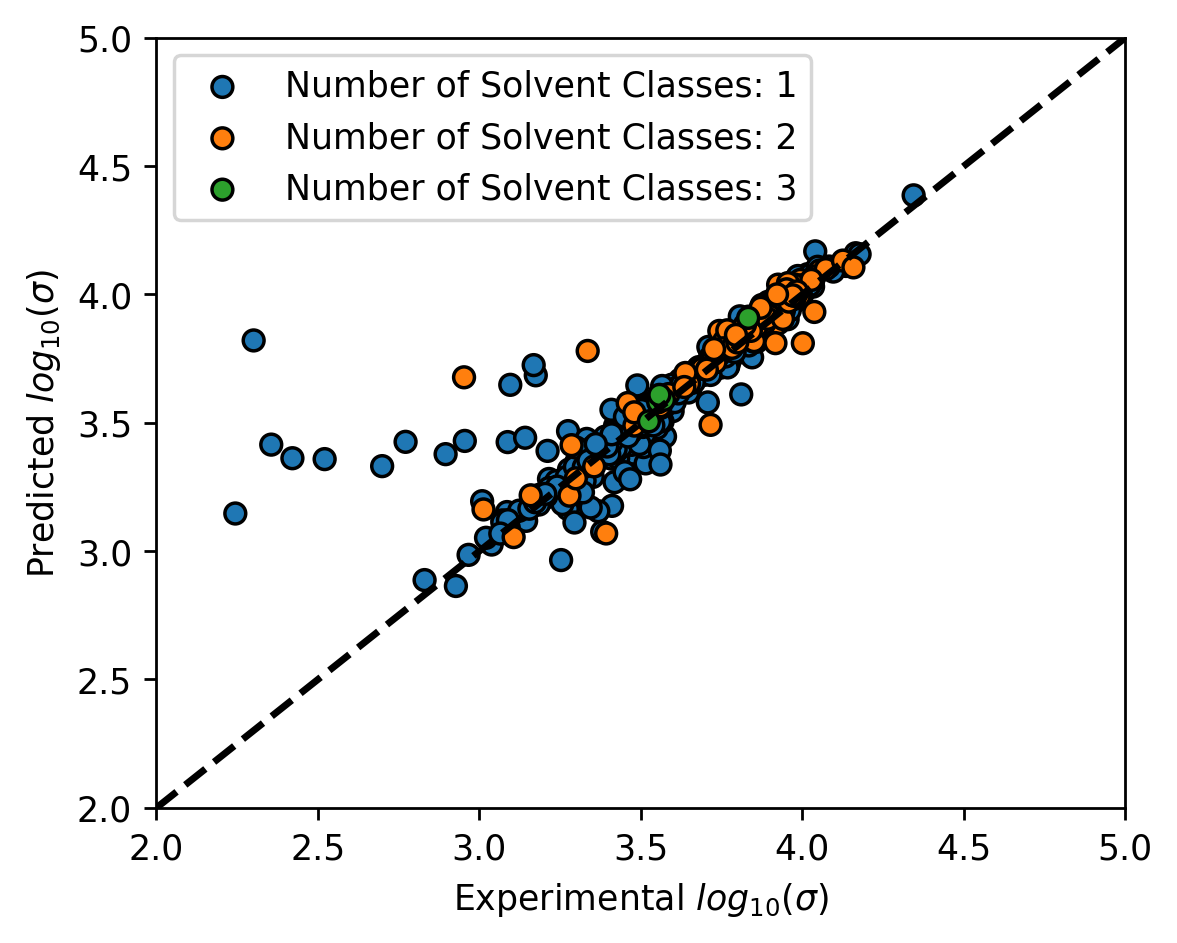

In [ ]:
fig = plt.figure(dpi=250,figsize=(5,4)) 
ax = fig.add_subplot() 
plt.xlabel('Experimental $log_{10}(σ)$')
ax.set_ylabel('Predicted $log_{10}(σ)$')

cmap = plt.get_cmap('tab10')  # Use the 'tab10' colormap (10 distinct colors)
unique_classes = data['unique_solvent_classes'].unique()
unique_classes.sort()

class_color_dict = {class_name: cmap(i) for i, class_name in enumerate(unique_classes)}

for i in unique_classes:
    data_plot = data[data['unique_solvent_classes'] == i]

    plt.scatter(data_plot['label log (uS/cm)'],data_plot['pred log(uS/cm}'],edgecolor='k', marker='o',c=data_plot['unique_solvent_classes'].map(class_color_dict),label='Number of Solvent Classes: ' +str(i))
    # plt.scatter(predictions,labels, color='steelblue',edgecolor='k', marker='o')

    predictions = data_plot['pred log(uS/cm}']
    predictions = np.reshape(predictions,-1)
    labels = data_plot['label log (uS/cm)']
    labels = np.reshape(labels,-1)

    MSE = np.square(np.subtract(labels,predictions)).mean()
    RMSE = math.sqrt(MSE)
    RMSE = round(RMSE,3)
    print('Model Performance')
    print(f'RMSE = {RMSE} with {i} solvent classes')
    plt.legend(fontsize=10,loc='upper left')

plt.xlim([2,5])
plt.ylim([2,5])

x_limits = ax.get_xlim()
y_limits = ax.get_ylim()

plt.plot(x_limits,y_limits,color='k',linestyle='dashed',linewidth=2) # identity line

# Vizualize validation data and literature data

In [6]:
file_path = "/Users/murtazazohair/Library/CloudStorage/Box-Box/IBM INTERNAL - Battery Team Database_2019-2025/AI-ML Projects/Ionic Conductivity/Electrolyte Screening/lit_data/train_082324_FM_pred.csv"
# data = pd.read_csv(formulation_file)
train_data = pd.read_csv(file_path)
file_path = "/Users/murtazazohair/Library/CloudStorage/Box-Box/IBM INTERNAL - Battery Team Database_2019-2025/AI-ML Projects/Ionic Conductivity/Electrolyte Screening/lit_data/test_082324_FM_pred.csv"
test_data = pd.read_csv(file_path)

lit_data = pd.concat([train_data,test_data],ignore_index=True)
lit_data.columns = [ent.strip() for ent in lit_data.columns]
lit_data = lit_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
lit_data.reset_index()
lit_data = lit_data[(lit_data['temperature'] > 15) & (lit_data['temperature'] < 25)]

val_data =  pd.read_excel('/Users/murtazazohair/Library/CloudStorage/Box-Box/IBM INTERNAL - Battery Team Database_2019-2025/AI-ML Projects/Ionic Conductivity/Electrolyte Screening/validation.xlsx')
# lit_data.columns = [ent.strip() for ent in lit_data.columns]
# lit_data = lit_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

fn = r'/Users/murtazazohair/Library/CloudStorage/Box-Box/IBM INTERNAL - Battery Team Database_2019-2025/AI-ML Projects/Ionic Conductivity/SMILES Materials Info.xlsx'
smiles_df = pd.read_excel(fn,header=0,usecols=[0,1,2,3,4,5,6])
 
lit_data

,Unnamed: 0,smiles,temperature,ionic,ionic_predicted,ionic (mS/cm),ionic_predicted (mS/cm),RMSE log,RMSE
20,20,O=C1O[B-]2(OC1=O)OC(=O)C(=O)O2.[Li+]<sep>1.405...,19.5000,3.321446,3.382535,2.096264,2.412876,NaN,NaN
24,24,F[P-](F)(F)(F)(F)F.[Li+]<sep>4.189567<sep>O=C1...,20.0000,3.808243,3.879893,6.430474,7.583904,NaN,NaN
43,43,F[P-](F)(F)(F)(F)F.[Li+]<sep>8.995444<sep>O=C1...,20.0000,3.787295,3.860495,6.127665,7.252620,NaN,NaN
59,59,F[P-](F)(F)(F)(F)F.[Li+]<sep>7.635921<sep>CC1C...,19.5000,3.831040,3.899742,6.777039,7.938567,NaN,NaN
90,90,F[P-](F)(F)(F)(F)F.[Li+]<sep>4.862049<sep>CC1C...,19.5000,3.781396,3.848295,6.044996,7.051727,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11212,1026,F[As-](F)(F)(F)(F)F.[Li+]<sep>7.106032<sep>ClC...,20.0000,3.859138,3.884454,7.229995,7.663970,0.025316,0.433975
11213,699,F[P-](F)(F)(F)(F)F.[Li+]<sep>8.53199<sep>O=C1O...,20.0000,3.885924,3.911226,7.689959,8.151280,0.025302,0.461321
11247,858,F[P-](F)(F)(F)(F)F.[Li+]<sep>3.007365<sep>O=C1...,19.8500,3.893875,3.917177,7.832042,8.263754,0.023302,0.431713
11284,114,O=C1O[B-]2(OC1=O)OC(=O)C(=O)O2.[Li+]<sep>9.406...,24.4570,4.165517,4.145220,14.639188,13.970759,0.020297,0.668429


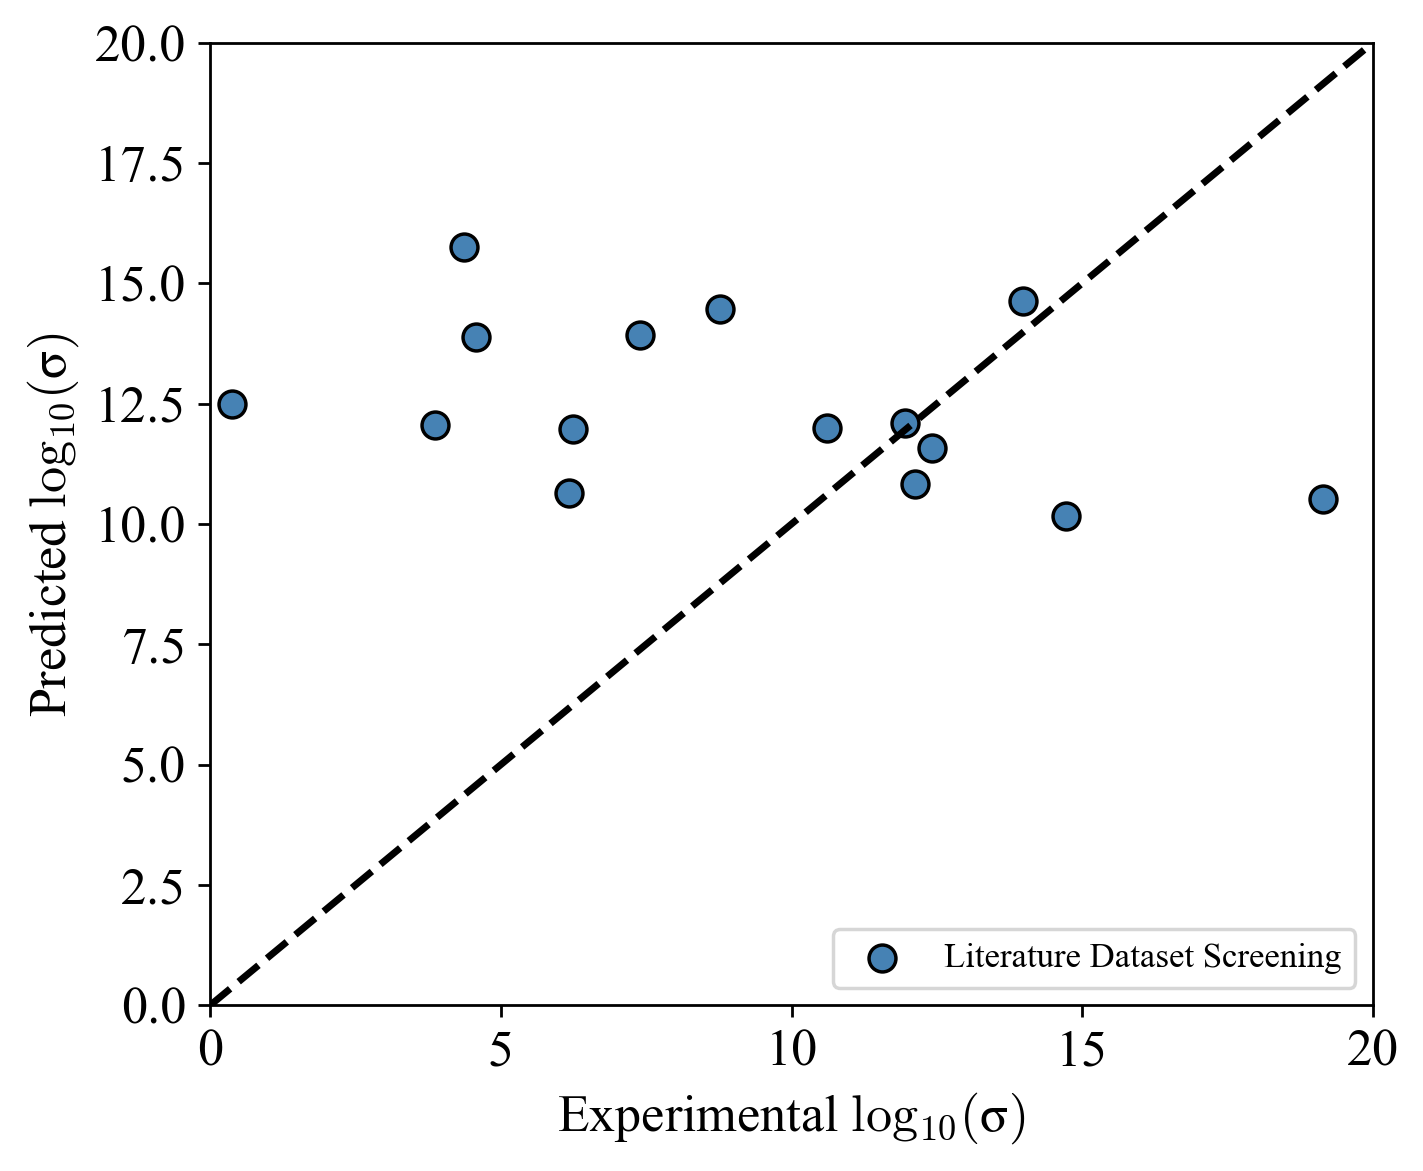

In [ ]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams.update({'font.size': 15})    

fig = plt.figure(dpi=250,figsize=(6,5)) 
ax = fig.add_subplot() 

plt.xlabel('Experimental $log_{10}(σ)$')
ax.set_ylabel('Predicted $log_{10}(σ)$')

# plt.scatter(lit_data['ionic'],lit_data['ionic_predicted'], color='gray', marker='o',label='literature',s=20,alpha=0.5,edgecolors='none')

val_data1 = val_data[val_data['Molecule Source']=='Literature Dataset']
plt.scatter(val_data1['ionic (mS/cm)'],val_data1['ionic_predicted (mS/cm)'], color='steelblue',edgecolor='k', marker='o',label='Literature Dataset Screening',s=60)
# val_data2 = val_data[val_data['Components'] == 'New Molecules']
# plt.scatter(val_data2['ionic (mS/cm)'],val_data2['ionic_predicted (mS/cm)'], color='darkgoldenrod',edgecolor='k', marker='o',label='New Molecules',s=60)

# val_data1 = val_data[val_data['Molecule Source']=='Literature Dataset']
# plt.scatter(val_data1['ionic'],val_data1['ionic_predicted'], color='gold',edgecolor='k', marker='o',label='Screened Electrolytes',s=60)
# val_data2 = val_data[val_data['Components'] == 'New Molecules']
# plt.scatter(val_data2['ionic'],val_data2['ionic_predicted'], color='darkgoldenrod',edgecolor='k', marker='o',label='New Molecules',s=60)


# plt.legend(fontsize=10,loc = 'lower right')

# plt.xlim([-0.1,5])
# plt.ylim([-0.1,5])

plt.xlim([0,20])
plt.ylim([0,20])


x_limits = ax.get_xlim()
y_limits = ax.get_ylim()


plt.plot(x_limits,y_limits,color='k',linestyle='dashed',linewidth=2) # identity line

plt.show()


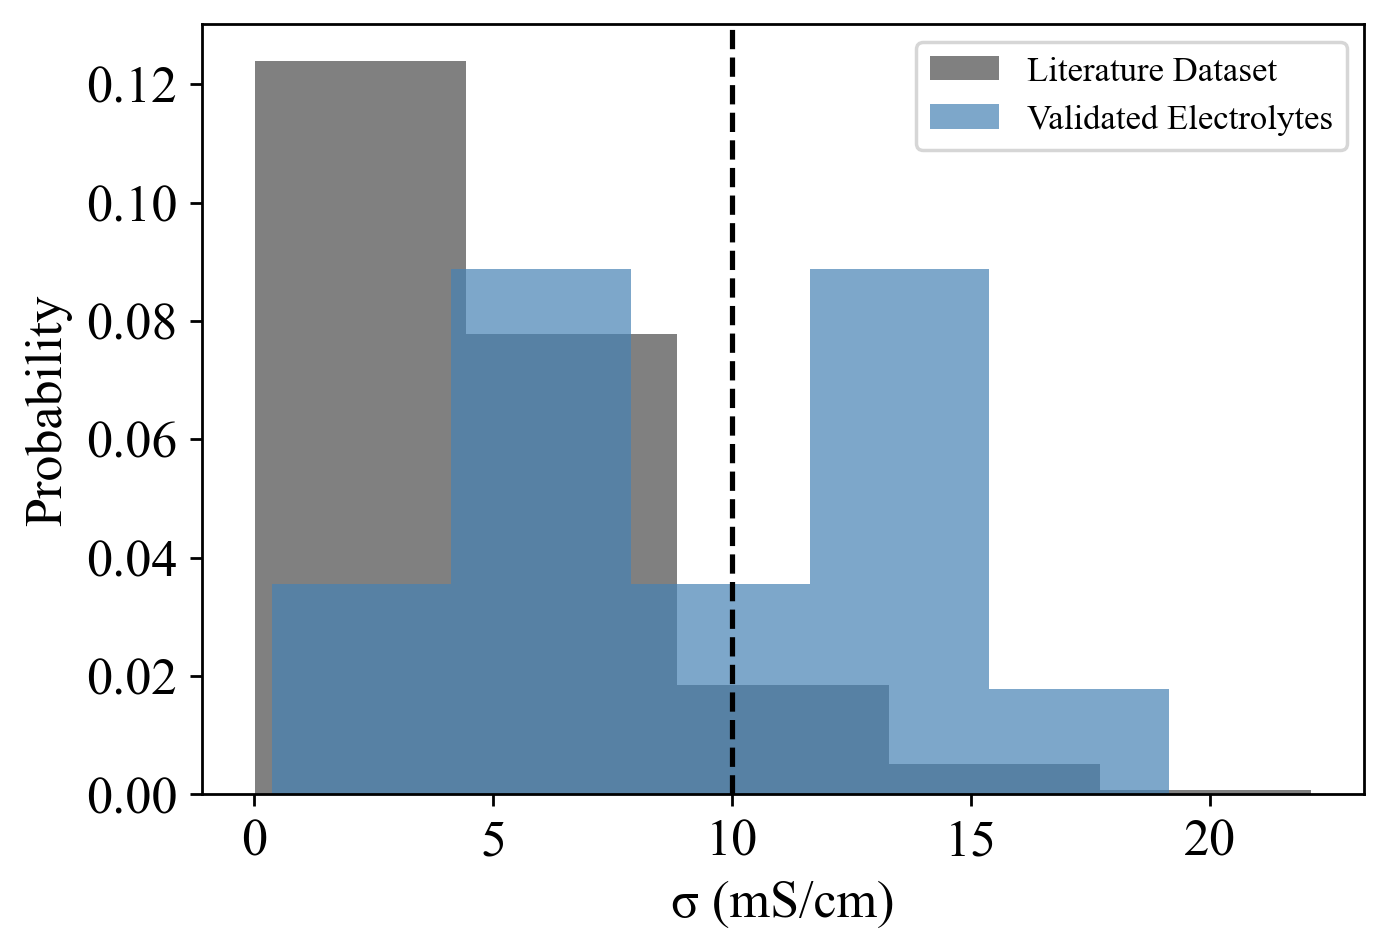

In [6]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams.update({'font.size': 15})    

fig = plt.figure(dpi=250,figsize=(6,4)) 
ax = fig.add_subplot() 

plt.xlabel('σ (mS/cm)')
ax.set_ylabel('Probability')

plt.hist(lit_data['ionic (mS/cm)'], color='gray',label='Literature Dataset',bins=5,density=True)

val_data1 = val_data[val_data['Molecule Source']=='Literature Dataset']
plt.hist(val_data1['ionic (mS/cm)'], color='steelblue',label='Validated Electrolytes',bins=5,density=True,alpha=0.7)
# val_data2 = val_data[val_data['Components'] == 'New Molecules']


plt.legend(fontsize=10,loc = 'upper right')

# plt.xlim([-0.1,5])
# plt.ylim([-0.1,5])

x_limits = ax.get_xlim()
y_limits = ax.get_ylim()


# plt.plot(x_limits,y_limits,color='k',linestyle='dashed',linewidth=2) # identity line

# Add a vertical dashed line at x=1
plt.axvline(x=10, color='k', linestyle='--')

plt.show()


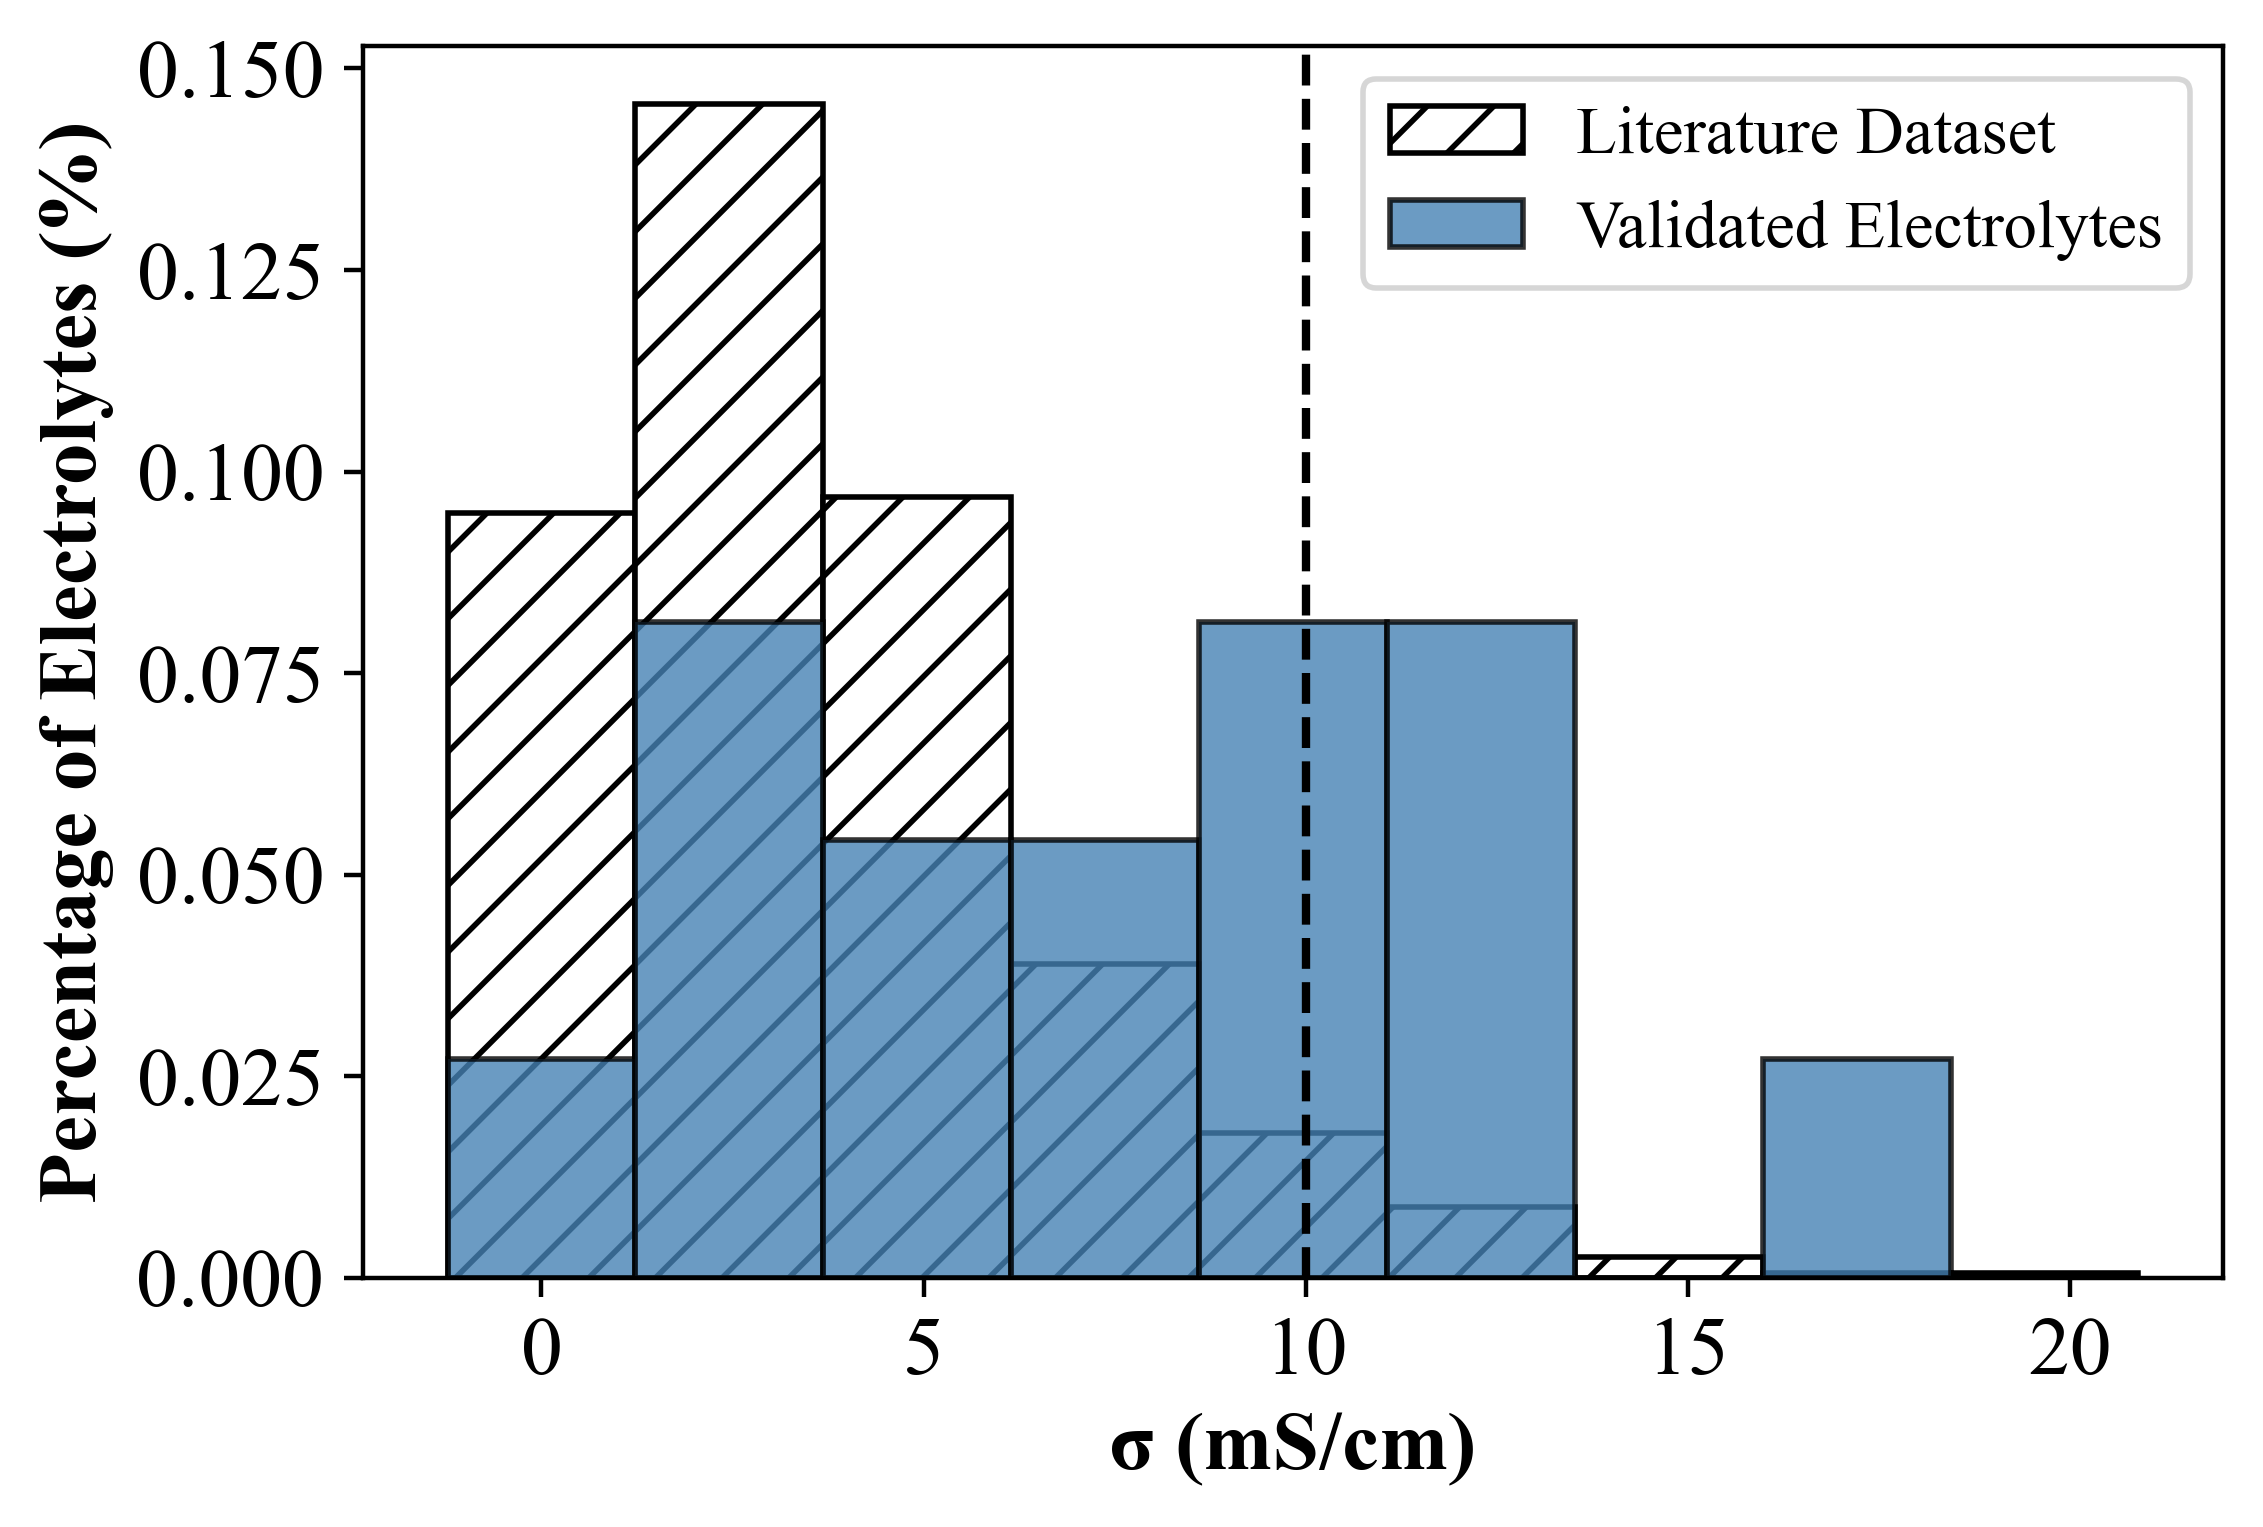

In [13]:
# Create histogram data
val_data1 = val_data[val_data['Molecule Source']=='Literature Dataset']

ll = min(lit_data['ionic (mS/cm)'])
ul = max(lit_data['ionic (mS/cm)'])

bins = np.linspace(ll,ul,10)

hist1, edges1 = np.histogram(lit_data['ionic (mS/cm)'], bins=bins,density=True)
hist2, edges2 = np.histogram(val_data1['ionic (mS/cm)'], bins=bins,density=True)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams.update({'font.size': 15})    

fig = plt.figure(dpi=400,figsize=(6,4)) 
ax = fig.add_subplot() 

ax.set_xlabel('σ (mS/cm)',fontweight= 'bold')
ax.set_ylabel('Percentage of Electrolytes (%)', fontweight= 'bold')

# Plot first histogram as filled bars
ax.bar(edges1[:-1], hist1, width=np.diff(edges1), facecolor = 'white', edgecolor='black',hatch='//', alpha=1, label="Literature Dataset")

# Plot second histogram with diagonal stripe pattern
bars = ax.bar(edges2[:-1], hist2, width=np.diff(edges2), edgecolor = 'black',facecolor = 'steelblue', alpha=0.8, label="Validated Electrolytes")

plt.axvline(x=10, color='k', linestyle='--')


plt.legend(fontsize=12,loc = 'upper right')
plt.show()

# Error by Solvent Class and Temp

In [22]:
file_path = "/Users/murtazazohair/Library/CloudStorage/Box-Box/[0] Murtaza Zohair/Projects/IC Model/Dataset Analysis/test_082324_FM_pred.xlsx"
data = pd.read_excel(file_path,skiprows = [1],engine='openpyxl')

data.columns = [ent.strip() for ent in data.columns]
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

fn = r'/Users/murtazazohair/Library/CloudStorage/Box-Box/IBM INTERNAL - Battery Team Database_2019-2024/AI-ML Projects/Ionic Conductivity/SMILES Materials Info.xlsx'
smiles_df = pd.read_excel(fn,header=0,usecols=[0,1,2,3,4,5,6])
# smiles_df = smiles_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


/var/folders/pg/wmpw28y134q72zh8t0pfrfrr0000gn/T/ipykernel_6750/3279677354.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solvent_smiles["SMILES"] = solvent_smiles["SMILES"].str.strip()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Aromatic'),
  Text(1, 0, 'C-S'),
  Text(2, 0, 'Carbonate'),
  Text(3, 0, 'Ester'),
  Text(4, 0, 'Ether'),
  Text(5, 0, 'Fluorinated Ether'),
  Text(6, 0, 'Halogenated Hydrocarbon'),
  Text(7, 0, 'Imidazole'),
  Text(8, 0, 'Ketone'),
  Text(9, 0, 'Lactone'),
  Text(10, 0, 'Nitrile'),
  Text(11, 0, 'Organophosphate')])

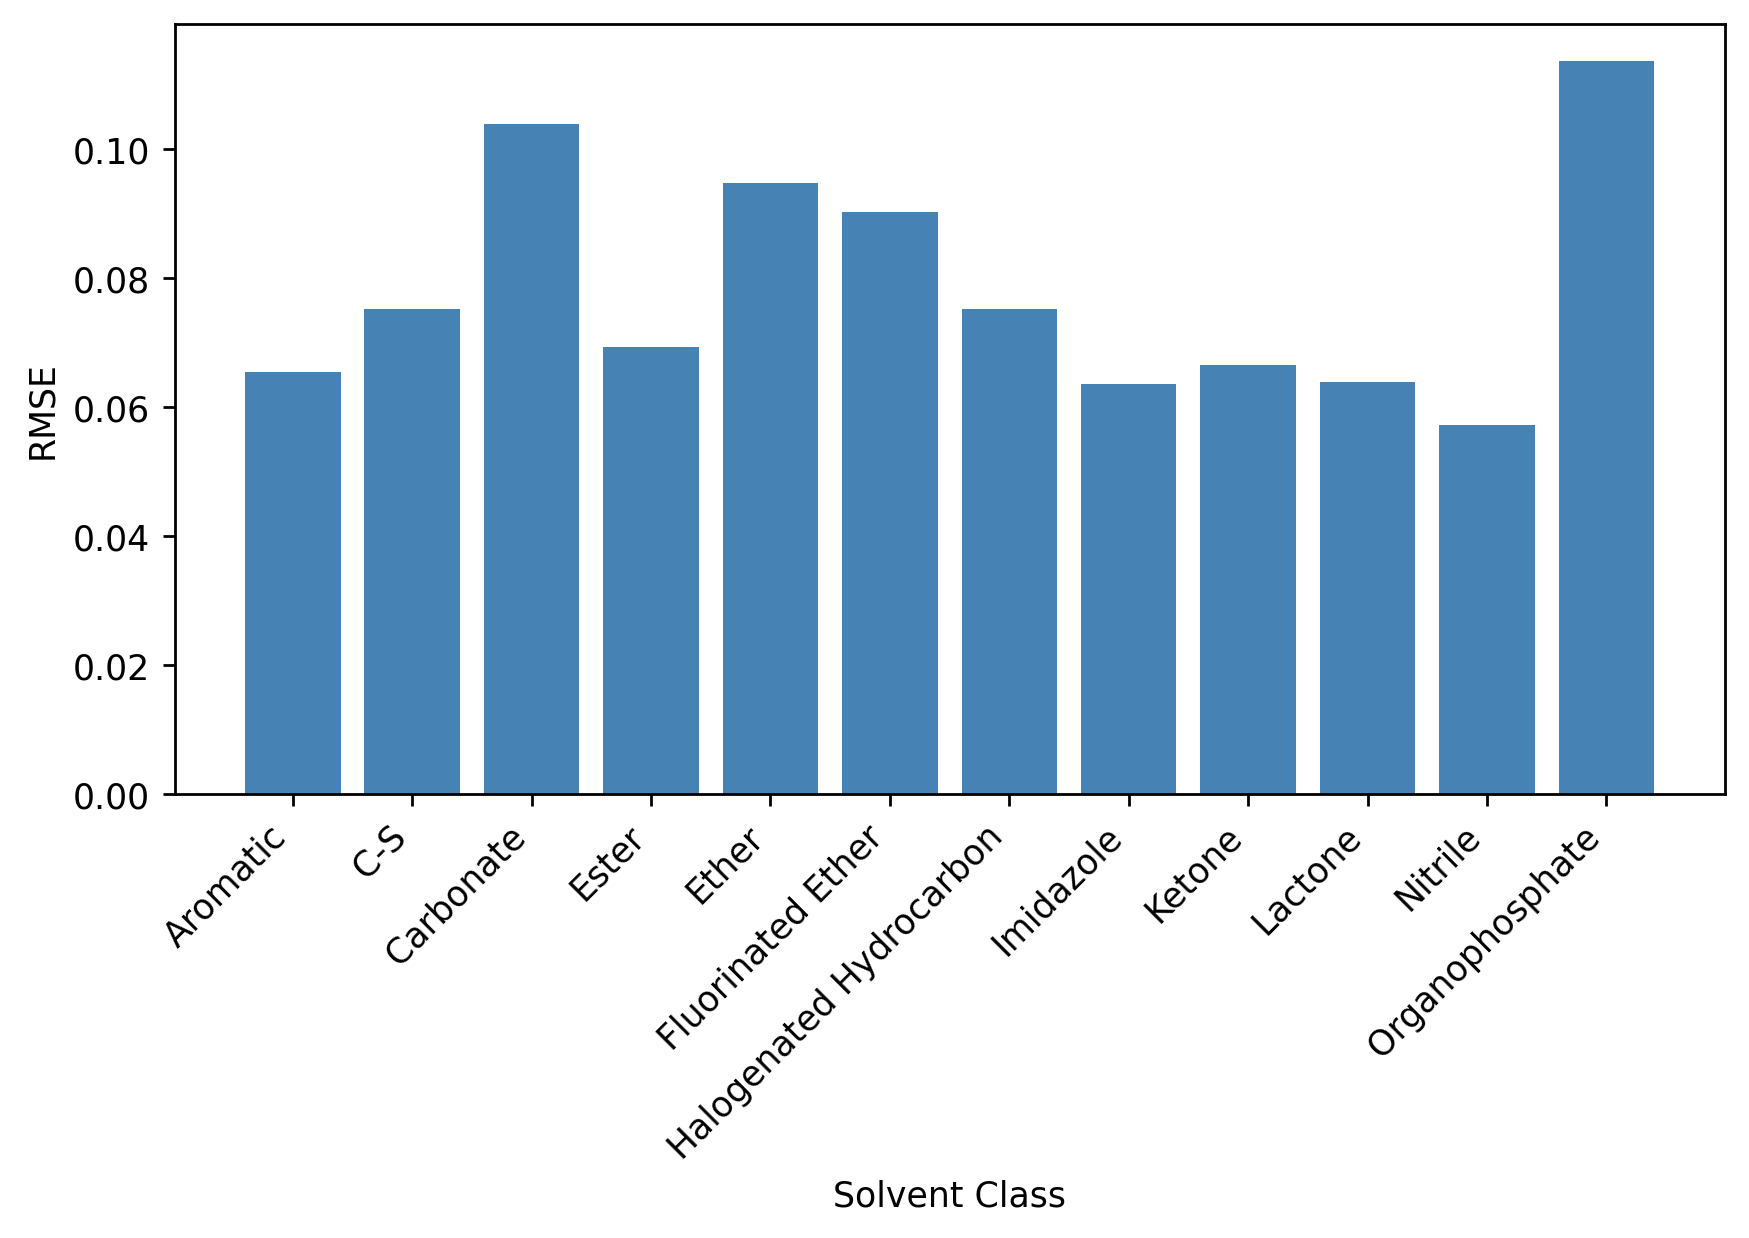

In [ ]:
### SOLVENTS ### 
# Filter for solvent smiles in Excel file 2
solvent_smiles = smiles_df[smiles_df["Role"] == "SOLVENT"]

# Melt the smiles1-smiles6 columns in Excel file 1 to have one smiles column
smiles_columns = [col for col in data.columns if col.lower().startswith("smiles")]
conc_columns = [col for col in data.columns if col.lower().startswith("conc")]

melted_df1 = data.melt(id_vars=["Error"], value_vars=smiles_columns, var_name="SMILES_column", value_name="SMILES")

# Melt corresponding concentration columns
melted_conc = pd.melt(data, id_vars=["Error"], 
                      value_vars=conc_columns, 
                      var_name="conc_column", 
                      value_name="conc")

# Ensure smiles and concentration columns align by row index
melted_df1["conc"] = melted_conc["conc"]

# Drop rows with missing smiles
melted_df1 = melted_df1.dropna(subset=["SMILES"])
melted_df1 = melted_df1[melted_df1["conc"] > 0]
melted_df1 = melted_df1[melted_df1["SMILES"] != "O"]

# Ensure 'smiles' columns match in both DataFrames
melted_df1["SMILES"] = melted_df1["SMILES"].str.strip()
solvent_smiles["SMILES"] = solvent_smiles["SMILES"].str.strip()

# Identify valid smiles (those with a solvent class) and ignored smiles
valid_smiles = solvent_smiles["SMILES"].unique()
ignored_smiles = melted_df1[~melted_df1["SMILES"].isin(valid_smiles)]["SMILES"].unique()

# Filter melted_df1 to include only valid smiles
filtered_df1 = melted_df1[melted_df1["SMILES"].isin(valid_smiles)]

# Merge filtered_df1 with solvent_smiles to map smiles to their classes
merged_df = pd.merge(filtered_df1, solvent_smiles, on="SMILES", how="inner")

# Calculate the RMSE for each class
solv_rmse_by_class = merged_df.groupby("Solvent Class")["Error"].mean().apply(np.sqrt).reset_index()

# Rename columns for clarity
solv_rmse_by_class.columns = ["Solvent Class", "Root Mean Squared Error"]

# Plot the histogram of RMSE vs Solvent Class

fig = plt.figure(dpi=250,figsize=(8,4))
ax = fig.add_subplot() 
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams.update({'font.size': 12})  

plt.bar(solv_rmse_by_class["Solvent Class"], solv_rmse_by_class["Root Mean Squared Error"], color='steelblue')
plt.xlabel("Solvent Class")
plt.ylabel("RMSE")
# plt.title("RMSE vs Solvent Class")
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()


In [1]:
solv_rmse_by_class

NameError: name 'solv_rmse_by_class' is not defined

/var/folders/pg/wmpw28y134q72zh8t0pfrfrr0000gn/T/ipykernel_6750/2237180392.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solvent_smiles["SMILES"] = solvent_smiles["SMILES"].str.strip()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'LIFSI'),
  Text(1, 0, 'LiAsF6'),
  Text(2, 0, 'LiBF4'),
  Text(3, 0, 'LiBMB'),
  Text(4, 0, 'LiBOB'),
  Text(5, 0, 'LiBPFPB'),
  Text(6, 0, 'LiCF3SO3'),
  Text(7, 0, 'LiClO4'),
  Text(8, 0, 'LiNO3'),
  Text(9, 0, 'LiPF6'),
  Text(10, 0, 'LiTDI'),
  Text(11, 0, 'LiTFSI')])

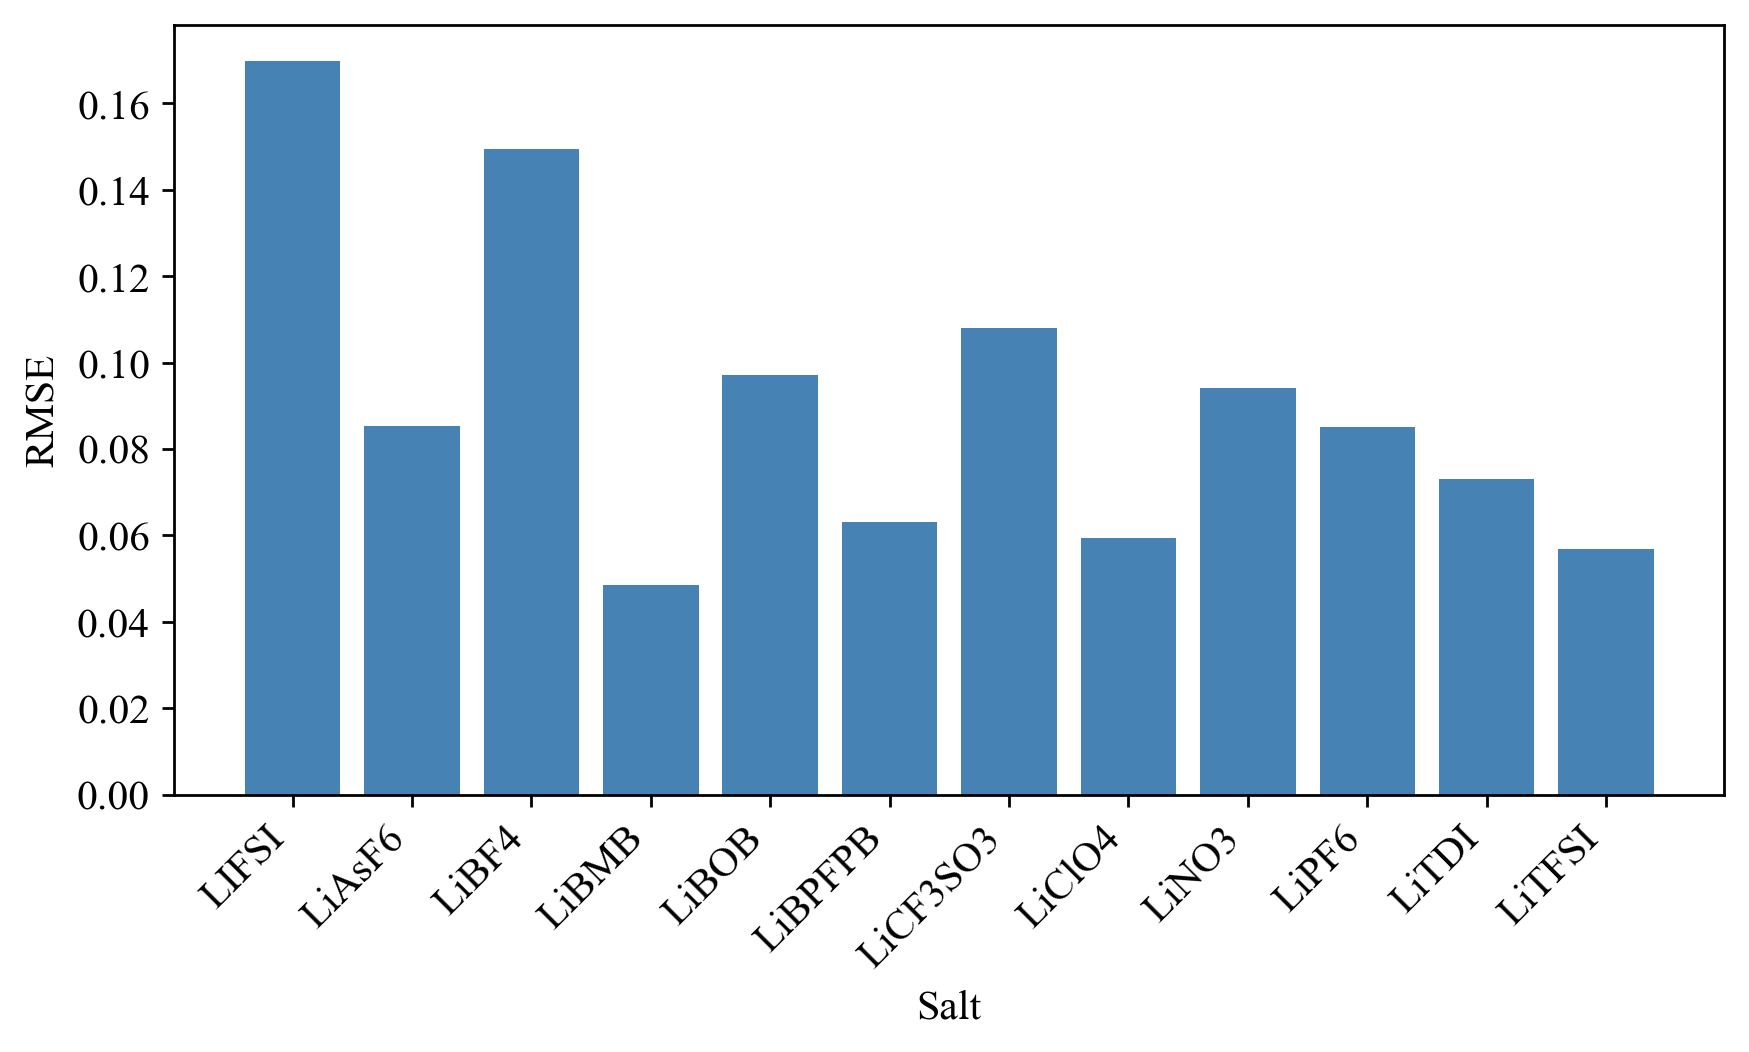

In [18]:
### SALTS ####

# Filter for solvent smiles in Excel file 2
solvent_smiles = smiles_df[smiles_df["Role"] == "SALT"]

# Melt the smiles1-smiles6 columns in Excel file 1 to have one smiles column
smiles_columns = [f"smiles{i}" for i in range(1, 7)]
melted_df1 = data.melt(id_vars=["Error"], value_vars=smiles_columns, var_name="SMILES_column", value_name="SMILES")

# Drop rows with missing smiles
melted_df1 = melted_df1.dropna(subset=["SMILES"])
melted_df1 = melted_df1[melted_df1["SMILES"] != "O"]

# Ensure 'smiles' columns match in both DataFrames
melted_df1["SMILES"] = melted_df1["SMILES"].str.strip()
solvent_smiles["SMILES"] = solvent_smiles["SMILES"].str.strip()

# Identify valid smiles (those with a solvent class) and ignored smiles
valid_smiles = solvent_smiles["SMILES"].unique()
ignored_smiles = melted_df1[~melted_df1["SMILES"].isin(valid_smiles)]["SMILES"].unique()

# Filter melted_df1 to include only valid smiles
filtered_df1 = melted_df1[melted_df1["SMILES"].isin(valid_smiles)]

# Merge filtered_df1 with solvent_smiles to map smiles to their classes
merged_df = pd.merge(filtered_df1, solvent_smiles, on="SMILES", how="inner")

# Calculate the RMSE for each class
salt_rmse_by_class = merged_df.groupby("Short Name")["Error"].mean().apply(np.sqrt).reset_index()

# Rename columns for clarity
salt_rmse_by_class.columns = ["Salt", "Root Mean Squared Error"]

# Plot the histogram of RMSE vs Solvent Class

fig = plt.figure(dpi=250,figsize=(8,4))
ax2 = fig.add_subplot() 
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams.update({'font.size': 12})  

plt.bar(salt_rmse_by_class["Salt"], salt_rmse_by_class["Root Mean Squared Error"], color='steelblue')
plt.xlabel("Salt")
plt.ylabel("RMSE")
# plt.title("RMSE vs Solvent Class")
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()


/var/folders/pg/wmpw28y134q72zh8t0pfrfrr0000gn/T/ipykernel_9331/4261206611.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(solv_rmse_by_class["Solvent Class"],rotation=30, ha='right')
/var/folders/pg/wmpw28y134q72zh8t0pfrfrr0000gn/T/ipykernel_9331/4261206611.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(salt_rmse_by_class["Salt"],rotation=30, ha='right')


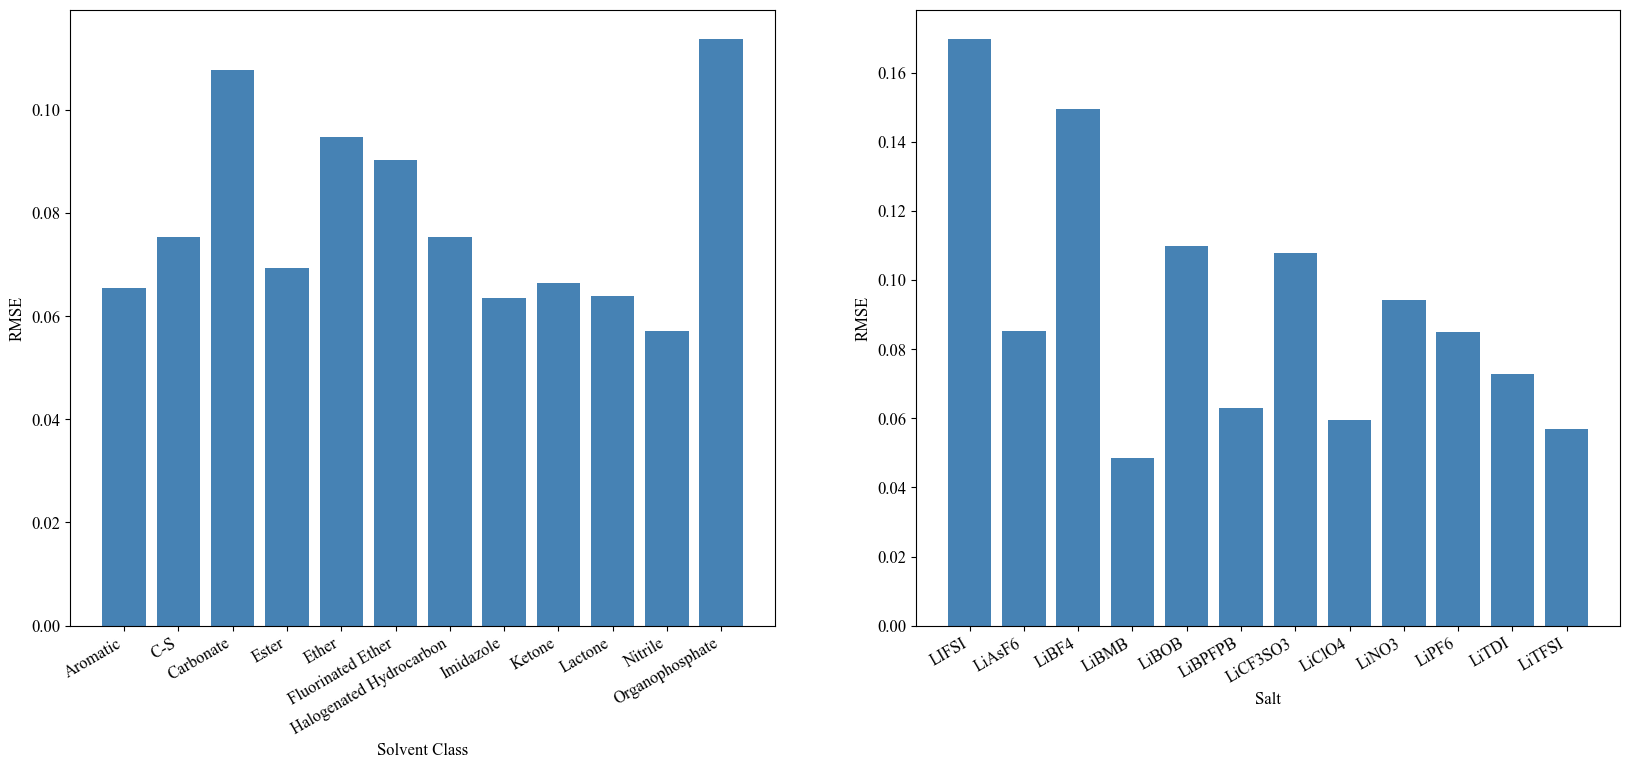

In [ ]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams.update({'font.size': 12})  
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.bar(solv_rmse_by_class["Solvent Class"], solv_rmse_by_class["Root Mean Squared Error"], color='steelblue')
ax1.set_xlabel("Solvent Class")
ax1.set_ylabel("RMSE")
# # plt.title("RMSE vs Solvent Class")
ax1.set_xticklabels(solv_rmse_by_class["Solvent Class"],rotation=30, ha='right')
# ax1.tight_layout()


# ax2 = fig.add_subplot() 
ax2.bar(salt_rmse_by_class["Salt"], salt_rmse_by_class["Root Mean Squared Error"], color='steelblue')
ax2.set_xlabel("Salt")
ax2.set_ylabel("RMSE")
# # plt.title("RMSE vs Solvent Class")
ax2.set_xticklabels(salt_rmse_by_class["Salt"],rotation=30, ha='right')
# plt.tight_layout()

plt.show()
